In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"G:\Uppsala Docs\period5&6\ProcessedData\2015-2019_sensorData_metrologicalData.csv")

# df = pd.read_csv(r"G:\Uppsala Docs\period5&6\ProcessedData\2015-2019_sensorData.csv")

print(df.info())
print(df.describe())
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450646 entries, 0 to 450645
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DateTimestamp          450646 non-null  object 
 1   Station Name           450646 non-null  object 
 2   NO2                    445087 non-null  float64
 3   NOX as NO2             445450 non-null  float64
 4   PM2.5                  183966 non-null  float64
 5   CO                     253349 non-null  float64
 6   Black Carbon           55003 non-null   float64
 7   O3                     75291 non-null   float64
 8   National Station Code  450646 non-null  float64
 9   Longitude              450646 non-null  float64
 10  Latitude               450646 non-null  float64
 11  Classification         450646 non-null  object 
 12  PM10                   267321 non-null  float64
 13  Air pressure           434080 non-null  float64
 14  Air temperature        450580 non-nu

Index(['DateTimestamp', 'Station Name', 'NO2', 'NOX as NO2', 'PM2.5', 'CO',
       'Black Carbon', 'O3', 'National Station Code', 'Longitude', 'Latitude',
       'Classification', 'PM10', 'Air pressure', 'Air temperature',
       'Amount of clouds', 'Precipitation amount', 'Wind direction',
       'Wind speed'],
      dtype='object')

Select Station, Drop Unwanted Columns

In [3]:
# selecting station #Stockholm Torkel Knutssongatan
df = df.loc[df['Station Name'] == "#Stockholm Torkel Knutssongatan"]

# (df['Station Name'] == "#Stockholm E4/E20 Lilla Essingen") |(df['Station Name'] == "#Stockholm Hornsgatan 108 Gata") | (df['Station Name'] == "#Stockholm Sveavägen 59 Gata") |

# rename stop column to DateTimeStamp
df = df.rename(columns={"Stop": "DateTimestamp"})

# convert columns to date
df['DateTimestamp'] = pd.to_datetime(df['DateTimestamp'])

# select columns
df = df[['DateTimestamp','Station Name','Classification','NO2','NOX as NO2','PM2.5',
         'PM10','Air pressure','Air temperature', 'Amount of clouds', 'Precipitation amount',
         'Wind direction', 'Wind speed']]
        
print(df['Station Name'].unique())
print()
print(df.info())
print(df.describe())

['#Stockholm Torkel Knutssongatan']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43824 entries, 8 to 450645
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DateTimestamp         43824 non-null  datetime64[ns]
 1   Station Name          43824 non-null  object        
 2   Classification        43824 non-null  object        
 3   NO2                   43420 non-null  float64       
 4   NOX as NO2            43423 non-null  float64       
 5   PM2.5                 40939 non-null  float64       
 6   PM10                  42113 non-null  float64       
 7   Air pressure          42318 non-null  float64       
 8   Air temperature       43818 non-null  float64       
 9   Amount of clouds      41922 non-null  float64       
 10  Precipitation amount  43806 non-null  float64       
 11  Wind direction        42318 non-null  object        
 12  Wind speed            42318 non-null

Removing Outliers Using Isolation Forest

In [4]:
# Generating weektype from day of week
df['Weektype'] = pd.DatetimeIndex(df['DateTimestamp']).dayofweek
# Replace weedays labels WeekDays and WeekEnds 
df['Weektype'] = df['Weektype'].replace([0, 1, 2, 3, 4], 'WeekDay')
df['Weektype'] = df['Weektype'].replace([5, 6], 'WeekEnd')

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43824 entries, 8 to 450645
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DateTimestamp         43824 non-null  datetime64[ns]
 1   Station Name          43824 non-null  object        
 2   Classification        43824 non-null  object        
 3   NO2                   43420 non-null  float64       
 4   NOX as NO2            43423 non-null  float64       
 5   PM2.5                 40939 non-null  float64       
 6   PM10                  42113 non-null  float64       
 7   Air pressure          42318 non-null  float64       
 8   Air temperature       43818 non-null  float64       
 9   Amount of clouds      41922 non-null  float64       
 10  Precipitation amount  43806 non-null  float64       
 11  Wind direction        42318 non-null  object        
 12  Wind speed            42318 non-null  float64       
 13  Weektype       

In [5]:
# Generating Hour class 'Transition', 'Night', 'Traffic', 'Peak'
df = df.assign(Hour=pd.cut(df['DateTimestamp'].dt.hour,[0,1,5,6,9,16,20,22,24],labels=['Transition','Night','Transition','Traffic','Peak','Traffic','Peak','Transition'],ordered=False))
# Replace timestamp 00:00 with Transition
df['Hour'] = df['Hour'].fillna('Transition')
df['Hour'] = df.Hour.astype(str)

# Arranging columns
df = df[['DateTimestamp','Station Name','Classification','Weektype','Hour', 'NO2',
         'NOX as NO2', 'PM2.5', 'PM10','Air pressure','Air temperature', 'Amount of clouds',
         'Precipitation amount','Wind direction', 'Wind speed']]

print(df.info())
print(df.describe())
df.groupby(['Classification','Weektype','Hour']).aggregate('count').drop(['DateTimestamp'],1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43824 entries, 8 to 450645
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DateTimestamp         43824 non-null  datetime64[ns]
 1   Station Name          43824 non-null  object        
 2   Classification        43824 non-null  object        
 3   Weektype              43824 non-null  object        
 4   Hour                  43824 non-null  object        
 5   NO2                   43420 non-null  float64       
 6   NOX as NO2            43423 non-null  float64       
 7   PM2.5                 40939 non-null  float64       
 8   PM10                  42113 non-null  float64       
 9   Air pressure          42318 non-null  float64       
 10  Air temperature       43818 non-null  float64       
 11  Amount of clouds      41922 non-null  float64       
 12  Precipitation amount  43806 non-null  float64       
 13  Wind direction 

Station Name    NO2  NOX as NO2  PM2.5  \
Classification   Weektype Hour                                                 
Urban Background WeekDay  Night               5216   5161        5161   4871   
                          Peak               11736  11599       11599  10954   
                          Traffic             9128   9028        9028   8528   
                          Transition          5216   5163        5164   4873   
                 WeekEnd  Night               2088   2070        2071   1951   
                          Peak                4698   4681        4681   4390   
                          Traffic             3654   3640        3640   3417   
                          Transition          2088   2078        2079   1955   

                                       PM10  Air pressure  Air temperature  \
Classification   Weektype Hour                                               
Urban Background WeekDay  Night        5010          5040             5216   
                          Peak        11180         11331            11734   
                          Traffic      8736          8813             9126   
                          Transition   5010          5038             5214   
                 WeekEnd  Night        2036          2016             2088   
                          Peak         4558          4536             4698   
                          Traffic      3545          3528             3654   
                          Transition   2038          2016             2088   

                                      Amount of clouds  Precipitation amount  \
Classification   Weektype Hour                                                 
Urban Background WeekDay  Night                   4988                  5216   
                          Peak                   11223                 11727   
                          Traffic                 8729                  9121   
                          Transition              4987                  5214   
                 WeekEnd  Night                   2000                  2088   
                          Peak                    4498                  4698   
                          Traffic                 3498                  3654   
                          Transition              1999                  2088   

                                      Wind direction  Wind speed  
Classification   Weektype Hour                                    
Urban Background WeekDay  Night                 5040        5040  
                          Peak                 11331       11331  
                          Traffic               8813        8813  
                          Transition            5038        5038  
                 WeekEnd  Night                 2016        2016  
                          Peak                  4536        4536  
                          Traffic               3528        3528  
                          Transition            2016        2016

Classification == "Urban Background" & Weektype == "WeekDay" & Hour == "Transition"
Classification == "Urban Background" & Weektype == "WeekDay" & Hour == "Night"
Classification == "Urban Background" & Weektype == "WeekDay" & Hour == "Traffic"
Classification == "Urban Background" & Weektype == "WeekDay" & Hour == "Peak"
Classification == "Urban Background" & Weektype == "WeekEnd" & Hour == "Transition"
Classification == "Urban Background" & Weektype == "WeekEnd" & Hour == "Night"
Classification == "Urban Background" & Weektype == "WeekEnd" & Hour == "Traffic"
Classification == "Urban Background" & Weektype == "WeekEnd" & Hour == "Peak"


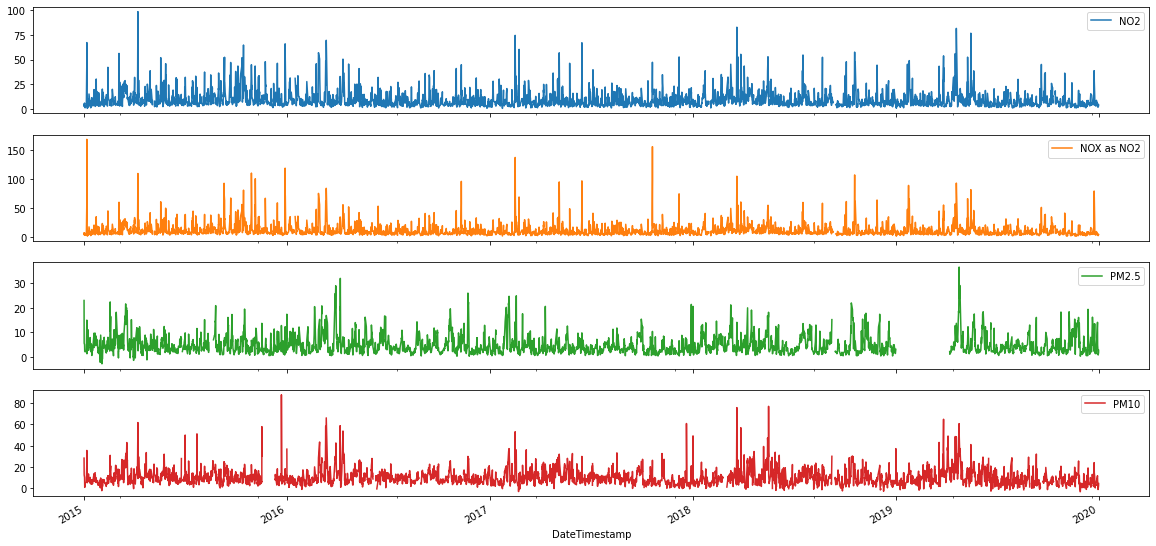

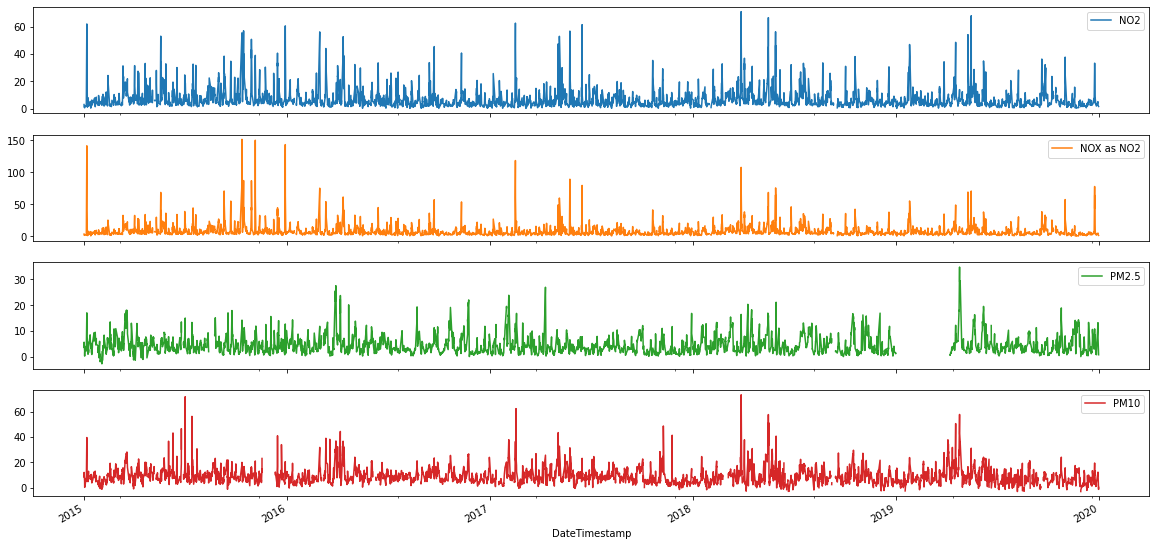

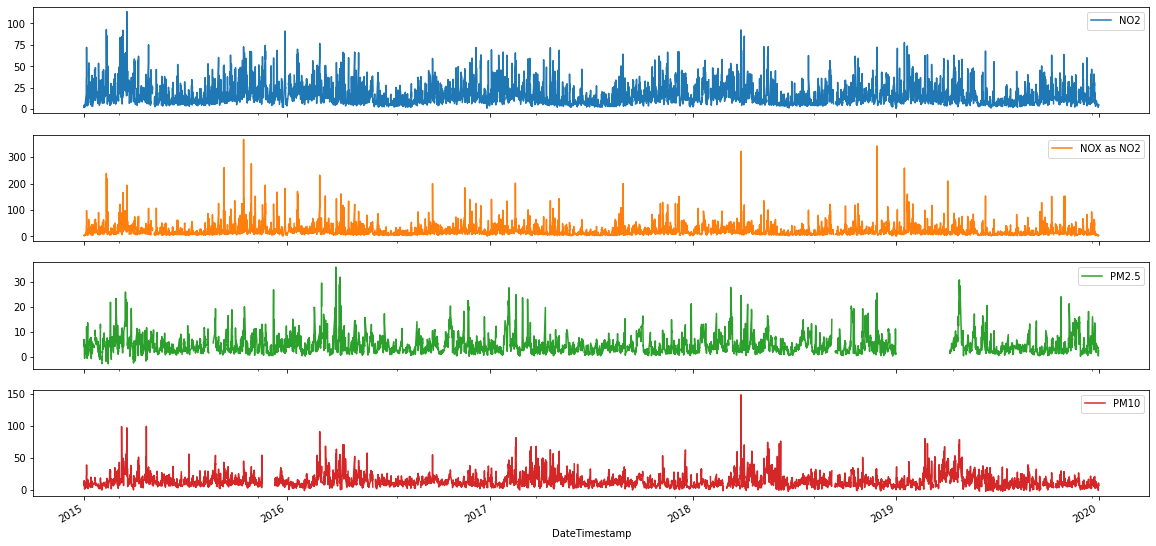

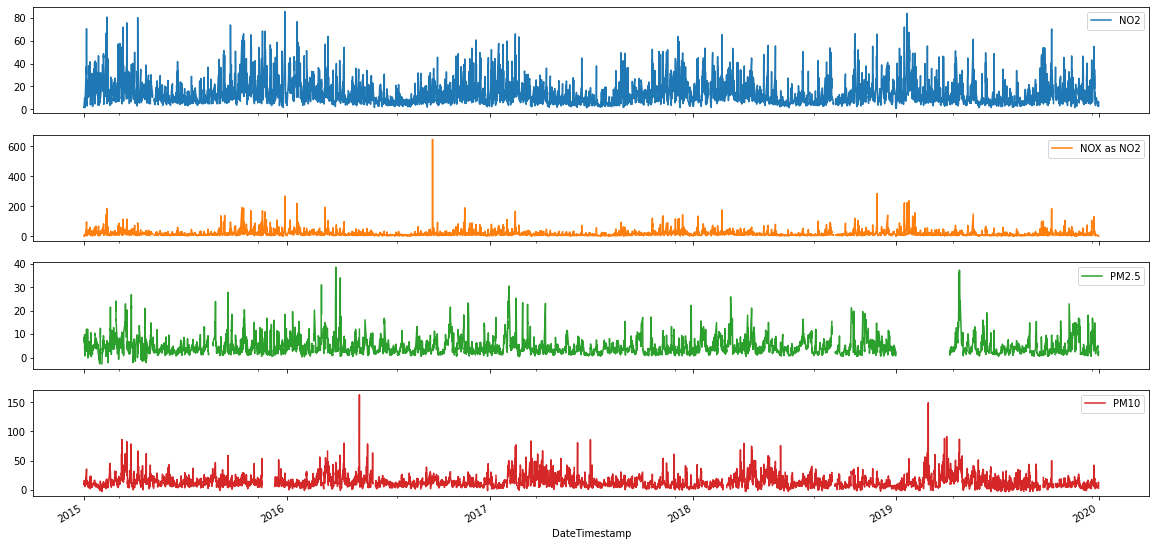

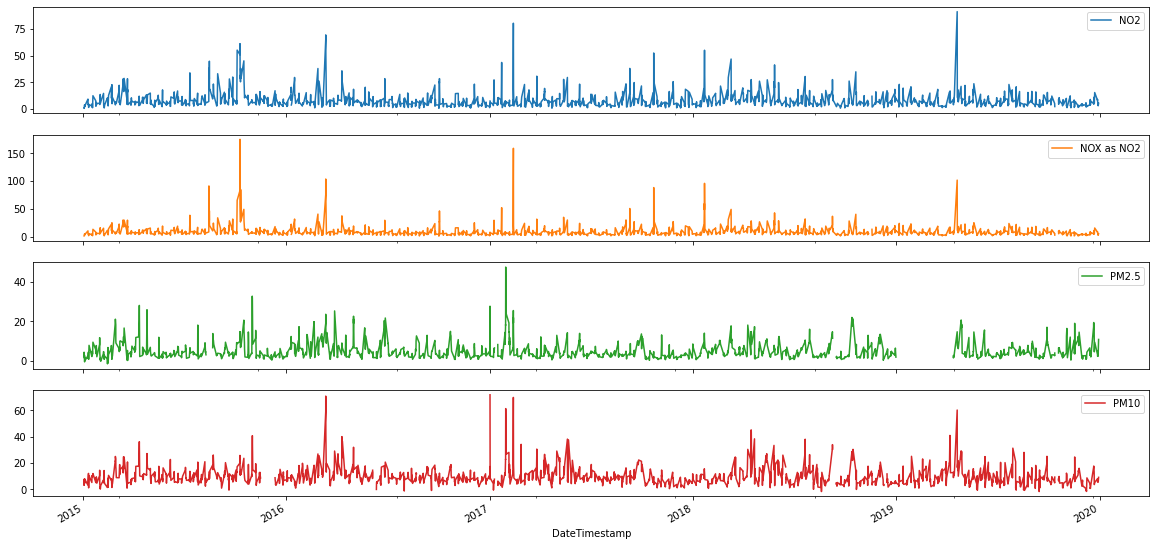

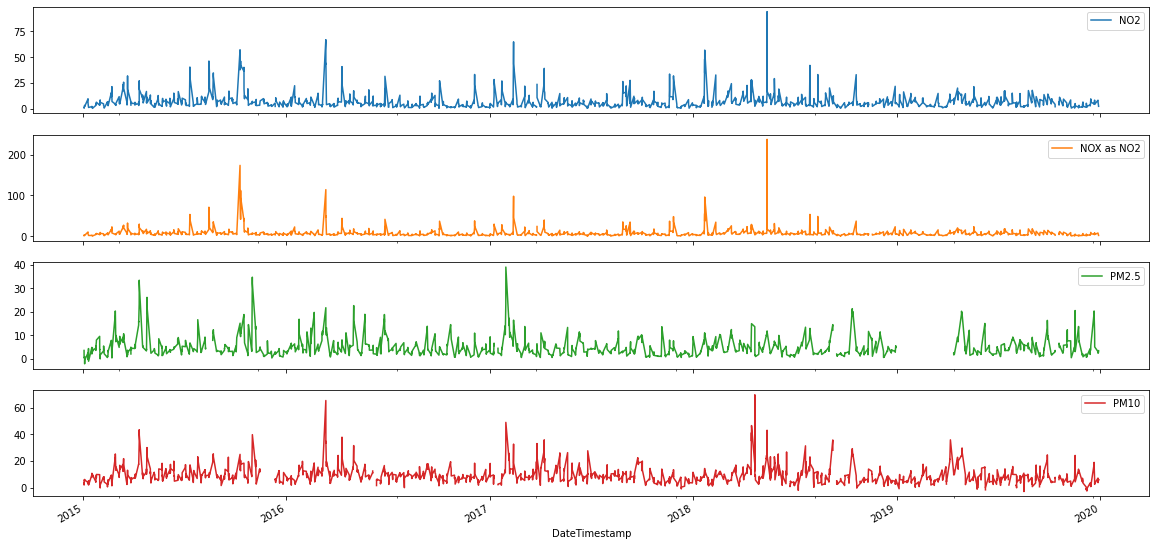

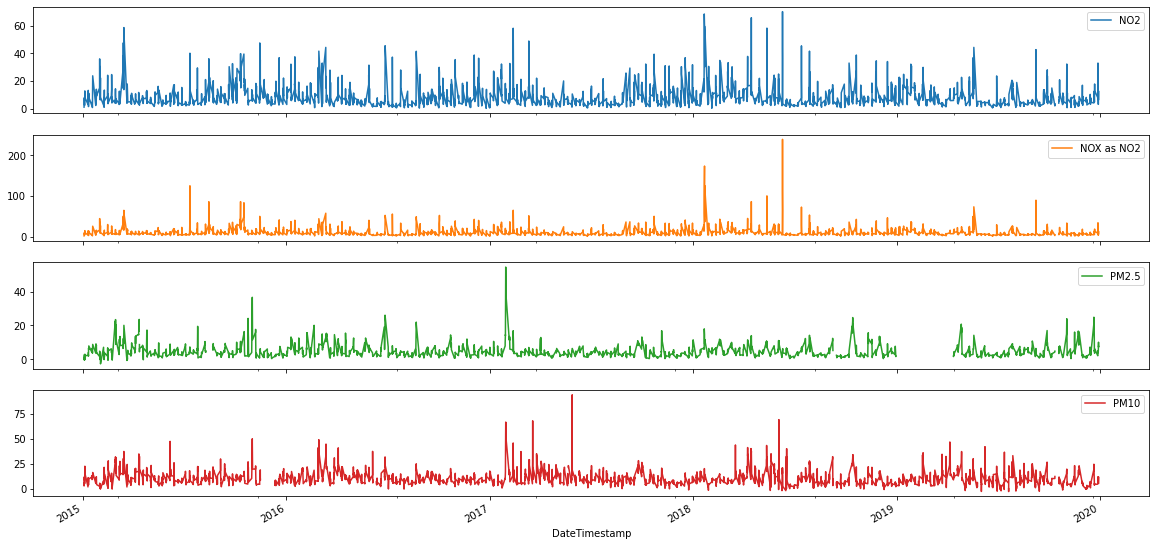

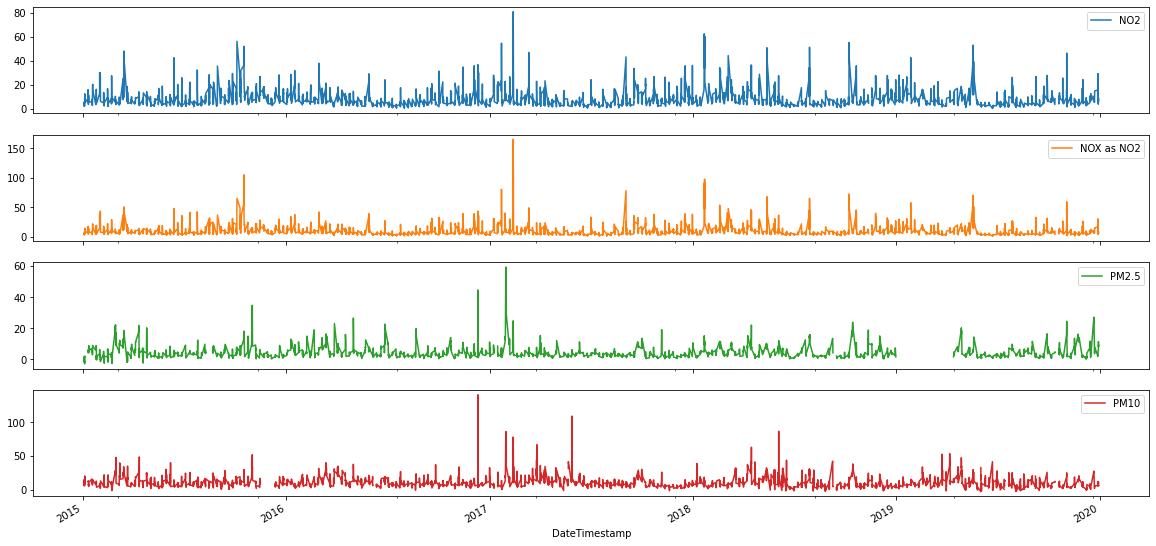

In [6]:
# Time Series before outlier removal

cfilt = list(df['Classification'].unique())
wfilt = list(df['Weektype'].unique())
hfilt = list(df['Hour'].unique())

temp = df
temp = temp.set_index("DateTimestamp")

for clvl in cfilt:
    for wlvl in wfilt:
        for hlvl in hfilt:
            print('Classification == "'+str(clvl)+'" & Weektype == "'+str(wlvl)+'" & Hour == "'+str(hlvl)+'"')
            # generate segment data
            plot_data1 = temp.query('Classification == "'+str(clvl)+'" & Weektype == "'+str(wlvl)+'" & Hour == "'+str(hlvl)+'"')
            # ploting the current segment
            plot_data1[['Station Name','Classification',
                        'Weektype','Hour','NO2', 'NOX as NO2',
                        'PM2.5', 'PM10']].plot(figsize = (20,10), subplots = True)

In [7]:
from sklearn.ensemble import IsolationForest

# remove warning
pd.set_option('mode.chained_assignment', None)

## Removing Outliers based on individual spatial classes
# replace na with zero
df_1 = df.fillna(-5)

# IsolationForest parameter
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination='auto', \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=1)

cfilt = list(df_1['Classification'].unique())
wfilt = list(df_1['Weektype'].unique())
hfilt = list(df_1['Hour'].unique())

df_2 = pd.DataFrame(columns = ['DateTimestamp','Station Name','Classification',
                               'Weektype','Hour','NO2', 'NOX as NO2','PM2.5', 'PM10'])

for clvl in cfilt:
    for wlvl in wfilt:
        for hlvl in hfilt:
            
            print('Classification == "'+str(clvl)+'" & Weektype == "'+str(wlvl)+'" & Hour == "'+str(hlvl)+'"')
            print(len(df_1.query('Classification == "'+str(clvl)+'" & Weektype == "'+str(wlvl)+'" & Hour == "'+str(hlvl)+'"')))
            temp = df_1.query('Classification == "'+str(clvl)+'" & Weektype == "'+str(wlvl)+'" & Hour == "'+str(hlvl)+'"')
            
            # detect Outliers
            to_model_columns=temp[['NO2','NOX as NO2','PM2.5','PM10']].columns
            # fiting data
            clf.fit(temp[to_model_columns])
            # predicting ouliers
            pred = clf.predict(temp[to_model_columns])
            # marking outliers
            temp['anomaly'] = pred
            outliers=temp.loc[temp['anomaly']==-1]
            #outlier_index=list(outliers.index)

            # number of anomalies(-1) and normal points(1)
            print(temp['anomaly'].value_counts())
            df_2 = df_2.append(temp)
            print('Appended\n')

#  revert back to nan            
df_2[to_model_columns] = df_2[to_model_columns].replace( -5, np.nan )
print('\n')
print('df_2 Description:')
print(df_2.info())
print(df_2.describe())

# selecting non-anomaly 
df_3 = df_2[df_2['anomaly'] == 1]
df_3 = df_3.drop(['anomaly'],axis = 1)
print('\n')
print('df_3 Description:')
print(df_3.info())
print(df_3.describe())

# saving non anomaly data
print("Saving File")
savePath = r"G:\Uppsala Docs\period5&6\ProcessedData"
df_3.to_csv(savePath+"\\"+'2015-2019_SensorData_SelectedFourStation.csv')      

Classification == "Urban Background" & Weektype == "WeekDay" & Hour == "Transition"
5216


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.5s finished


 1    4563
-1     653
Name: anomaly, dtype: int64
Appended

Classification == "Urban Background" & Weektype == "WeekDay" & Hour == "Night"
5216


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.6s finished


 1    4550
-1     666
Name: anomaly, dtype: int64
Appended

Classification == "Urban Background" & Weektype == "WeekDay" & Hour == "Traffic"
9128


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.5s finished


 1    7797
-1    1331
Name: anomaly, dtype: int64
Appended

Classification == "Urban Background" & Weektype == "WeekDay" & Hour == "Peak"
11736


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.5s finished


 1    10189
-1     1547
Name: anomaly, dtype: int64
Appended

Classification == "Urban Background" & Weektype == "WeekEnd" & Hour == "Transition"
2088


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.4s finished


 1    1836
-1     252
Name: anomaly, dtype: int64
Appended

Classification == "Urban Background" & Weektype == "WeekEnd" & Hour == "Night"
2088


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.6s finished


 1    1855
-1     233
Name: anomaly, dtype: int64
Appended

Classification == "Urban Background" & Weektype == "WeekEnd" & Hour == "Traffic"
3654


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.5s finished


 1    3166
-1     488
Name: anomaly, dtype: int64
Appended

Classification == "Urban Background" & Weektype == "WeekEnd" & Hour == "Peak"
4698


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.4s finished


 1    4113
-1     585
Name: anomaly, dtype: int64
Appended



df_2 Description:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43824 entries, 8 to 450095
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DateTimestamp         43824 non-null  datetime64[ns]
 1   Station Name          43824 non-null  object        
 2   Classification        43824 non-null  object        
 3   Weektype              43824 non-null  object        
 4   Hour                  43824 non-null  object        
 5   NO2                   43420 non-null  float64       
 6   NOX as NO2            43423 non-null  float64       
 7   PM2.5                 40939 non-null  float64       
 8   PM10                  42113 non-null  float64       
 9   Air pressure          43824 non-null  float64       
 10  Air temperature       43824 non-null  float64       
 11  Amount of clouds      43824 non-null  float64      

In [10]:
# distribution before outlier detection
df.groupby(['Classification',
            'Weektype',
            'Hour']).aggregate(['min', np.median, 'max'])

NO2               NOX as NO2         \
                                      min median    max        min median   
Classification   Weektype Hour                                              
Urban Background WeekDay  Night       0.3    4.5   70.9        0.5    5.3   
                          Peak        0.9   10.6   85.2        1.6   13.1   
                          Traffic     0.7   13.0  113.5        1.3   15.1   
                          Transition  0.4    6.4   98.6        0.9    7.2   
                 WeekEnd  Night       0.4    4.8   94.2        0.6    5.6   
                          Peak        0.5    6.1   81.1        1.4    7.5   
                          Traffic     0.3    5.9   70.1        1.0    7.1   
                          Transition  0.3    5.9   91.3        0.9    6.8   

                                            PM2.5              PM10  ...  \
                                        max   min median   max  min  ...   
Classification   Weektype Hour                                       ...   
Urban Background WeekDay  Night       151.7  -2.7    3.5  34.7 -3.0  ...   
                          Peak        647.0  -2.7    3.5  38.6 -2.9  ...   
                          Traffic     367.0  -2.8    3.6  36.0 -3.0  ...   
                          Transition  168.1  -2.9    3.6  36.5 -2.9  ...   
                 WeekEnd  Night       237.4  -2.2    3.7  39.0 -3.0  ...   
                          Peak        165.2  -2.8    3.3  59.3 -2.8  ...   
                          Traffic     239.5  -2.8    3.5  54.5 -3.0  ...   
                          Transition  175.1  -1.6    3.8  47.6 -1.8  ...   

                                     Air temperature Amount of clouds         \
                                                 max              min median   
Classification   Weektype Hour                                                 
Urban Background WeekDay  Night                 25.6              0.0   75.0   
                          Peak                  32.5              0.0   75.0   
                          Traffic               32.5              0.0   75.0   
                          Transition            25.6              0.0   75.0   
                 WeekEnd  Night                 24.1              0.0   88.0   
                          Peak                  31.6              0.0   75.0   
                          Traffic               31.6              0.0   75.0   
                          Transition            24.1              0.0   88.0   

                                            Precipitation amount               \
                                        max                  min median   max   
Classification   Weektype Hour                                                  
Urban Background WeekDay  Night       113.0                  0.0    0.0  32.6   
                          Peak        113.0                  0.0    0.0  23.8   
                          Traffic     113.0                  0.0    0.0  23.8   
                          Transition  113.0                  0.0    0.0  32.6   
                 WeekEnd  Night       113.0                  0.0    0.0  36.8   
                          Peak        113.0                  0.0    0.0  36.8   
                          Traffic     113.0                  0.0    0.0  36.8   
                          Transition  113.0                  0.0    0.0  36.8   

                                     Wind speed               
                                            min median   max  
Classification   Weektype Hour                                
Urban Background WeekDay  Night             0.0    3.0  11.0  
                          Peak              0.0    3.0  15.0  
                          Traffic           0.0    3.0  15.0  
                          Transition        0.0    3.0  11.0  
                 WeekEnd  Night             0.0    2.0   9.0  
                          Peak              0.0    3.0   9.0  
             

In [11]:
# distribution after outlier detection
df_3.groupby(['Classification',
              'Weektype',
              'Hour']).aggregate(['min', np.median, 'max'])

NO2              NOX as NO2         \
                                      min median   max        min median   
Classification   Weektype Hour                                             
Urban Background WeekDay  Night       0.3    4.2  23.0        0.8    5.0   
                          Peak        1.5    9.9  39.6        2.3   12.2   
                          Traffic     0.9   12.0  45.5        1.7   14.0   
                          Transition  0.4    5.9  27.4        0.9    6.8   
                 WeekEnd  Night       0.4    4.4  20.3        0.6    5.2   
                          Peak        0.6    5.7  24.7        1.5    7.0   
                          Traffic     0.3    5.4  24.9        1.0    6.6   
                          Transition  0.3    5.4  21.7        0.9    6.3   

                                           PM2.5              PM10  ...  \
                                       max   min median   max  min  ...   
Classification   Weektype Hour                                      ...   
Urban Background WeekDay  Night       24.4  -2.7    3.2  14.9 -3.0  ...   
                          Peak        55.1  -2.7    3.2  16.2 -2.9  ...   
                          Traffic     65.7  -2.8    3.4  16.7 -3.0  ...   
                          Transition  31.1  -2.9    3.3  16.5 -2.9  ...   
                 WeekEnd  Night       22.8  -2.2    3.5  19.4 -3.0  ...   
                          Peak        30.5  -2.8    3.1  18.0 -2.8  ...   
                          Traffic     29.0  -2.8    3.2  16.8 -3.0  ...   
                          Transition  23.3  -1.6    3.5  17.7 -1.8  ...   

                                     Air temperature Amount of clouds         \
                                                 max              min median   
Classification   Weektype Hour                                                 
Urban Background WeekDay  Night                 25.2             -5.0   75.0   
                          Peak                  32.5             -5.0   75.0   
                          Traffic               32.5             -5.0   75.0   
                          Transition            25.2             -5.0   75.0   
                 WeekEnd  Night                 24.1             -5.0   75.0   
                          Peak                  31.6             -5.0   75.0   
                          Traffic               31.6             -5.0   75.0   
                          Transition            24.1             -5.0   75.0   

                                            Precipitation amount               \
                                        max                  min median   max   
Classification   Weektype Hour                                                  
Urban Background WeekDay  Night       113.0                  0.0    0.0  32.6   
                          Peak        113.0                 -5.0    0.0  23.8   
                          Traffic     113.0                 -5.0    0.0  23.8   
                          Transition  113.0                 -5.0    0.0  32.6   
                 WeekEnd  Night       113.0                  0.0    0.0  36.8   
                          Peak        113.0                  0.0    0.0  36.8   
                          Traffic     113.0                  0.0    0.0  36.8   
                          Transition  113.0                  0.0    0.0  36.8   

                                     Wind speed               
                                            min median   max  
Classification   Weektype Hour                                
Urban Background WeekDay  Night            -5.0    3.0   9.0  
                          Peak             -5.0    3.0  15.0  
                          Traffic          -5.0    3.0  15.0  
                          Transition       -5.0    3.0   9.0  
                 WeekEnd  Night            -5.0    2.0   9.0  
                          Peak             -5.0    3.0   9.0  
                          Traffic  

In [18]:
# Time Series before outlier removal

cfilt = list(df['Classification'].unique())
wfilt = list(df['Weektype'].unique())
hfilt = list(df['Hour'].unique())

temp = df_3
temp = temp.set_index("DateTimestamp")

for clvl in cfilt:
    for wlvl in wfilt:
        for hlvl in hfilt:
            print('Classification == "'+str(clvl)+'" & Weektype == "'+str(wlvl)+'" & Hour == "'+str(hlvl)+'"')
            # generate segment data
            plot_data1 = temp.query('Classification == "'+str(clvl)+'" & Weektype == "'+str(wlvl)+'" & Hour == "'+str(hlvl)+'"')
            # ploting the current segment
            plot_data1[['Station Name','Classification',
                        'Weektype','Hour','NO2', 'NOX as NO2',
                        'PM2.5', 'PM10']].plot(figsize = (20,10), subplots = True)

NameError: name 'df_3' is not defined

In [26]:
## onehot encoding catergories column
# Get dummies
df_4 = pd.get_dummies(df[['DateTimestamp','Classification','Weektype','Hour','NOX as NO2','PM10',
                          'Air pressure','Air temperature', 'Amount of clouds', 'Precipitation amount',
                          'Wind direction', 'Wind speed']])
# ['DateTimestamp','Classification','Weektype','Hour','NO2', 'NOX as NO2','PM2.5', 'PM10']
print(df_4.info())
print(df_4.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43824 entries, 8 to 450645
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   DateTimestamp                    43824 non-null  datetime64[ns]
 1   NOX as NO2                       43423 non-null  float64       
 2   PM10                             42113 non-null  float64       
 3   Air pressure                     42318 non-null  float64       
 4   Air temperature                  43818 non-null  float64       
 5   Amount of clouds                 41922 non-null  float64       
 6   Precipitation amount             43806 non-null  float64       
 7   Wind speed                       42318 non-null  float64       
 8   Classification_Urban Background  43824 non-null  uint8         
 9   Weektype_WeekDay                 43824 non-null  uint8         
 10  Weektype_WeekEnd                 43824 non-null  uint8   

In [27]:
# No of zeros, negative and null rows
print('\nNo of Zeros Entries:\n',(df_4.iloc[:,1:9] == 0).astype(int).sum(axis=0))
print('\nNo of negative Entries:\n',(df_4.iloc[:,1:9] < 0).astype(int).sum(axis=0))
print('\nNo of null Entries:\n',(df_4.iloc[:,1:11].isnull()).astype(int).sum(axis=0))
# # drop negative rows
# df_4 = df_4[~(df_4.iloc[:,1:16] < 0).any(1)]
# # drop nan rows
# df_4 = df_4[~(df_4.iloc[:,1:16].isnull()).any(1)]
# print(df_4.info())
# print(df_4.describe())
# print(df_4.columns)
len(df_4.columns)


No of Zeros Entries:
 NOX as NO2                             0
PM10                                  40
Air pressure                           0
Air temperature                      180
Amount of clouds                    1944
Precipitation amount               24702
Wind speed                          3312
Classification_Urban Background        0
dtype: int64

No of negative Entries:
 NOX as NO2                            0
PM10                                410
Air pressure                          0
Air temperature                    6246
Amount of clouds                      0
Precipitation amount                  0
Wind speed                            0
Classification_Urban Background       0
dtype: int64

No of null Entries:
 NOX as NO2                          401
PM10                               1711
Air pressure                       1506
Air temperature                       6
Amount of clouds                   1902
Precipitation amount                 18
Wind speed     

31

In [28]:
# Generating Year
df_4['Year'] = df_4['DateTimestamp'].dt.year

# dropping 2020 data
df_4 = df_4[df_4['Year'] != 2020]

# defining the length of the train and test 
train_len = df_4.loc[df_4['Year'].isin([2015,2016,2017])].shape[0]
print('Train:',df_4.loc[df_4['Year'].isin([2015,2016,2017])].shape[0])
print('Test: ',df_4.loc[df_4['Year'].isin([2018,2019])].shape[0])

Train: 26303
Test:  17520


In [29]:
from sklearn.preprocessing import MinMaxScaler

## Modyfying data for training LSTM 

# selecting PM10 column
data_set  = df_4.iloc[:,1:len(df_4.columns)].values
data_set  = data_set.reshape(-1,len(df_4.columns)-1)
print("Data Set:\n",data_set[0])
print("Shape:\n",data_set.shape)
print()

# Normalisation of Data
sc = MinMaxScaler(feature_range = (0, 1))
data_set_scaled = sc.fit_transform(data_set)
print("Normalised Data Set:\n",data_set_scaled[0])
print()

# replace nan with -0.00001
data_set_scaled[np.isnan(data_set_scaled)] = -0.00001

# Generating Features and predictions
X = data_set_scaled[0:len(data_set_scaled)-1,:]
y = data_set_scaled[1:len(data_set_scaled),1] # PM10 index 

print("X:\n",X[0:3])
print("Y:\n",y[0:3])
print()
print("X Shape:\n",X.shape)
print("Y Shape:\n",y.shape)

Data Set:
 [6.2000e+00 2.8400e+01 1.0124e+03 2.4000e+00 7.5000e+01 0.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
 2.0150e+03]
Shape:
 (43823, 31)

Normalised Data Set:
 [0.00881671 0.18961353 0.58201701 0.36228814 0.66371681 0.
 0.06666667 0.         1.         0.         0.         0.
 0.         1.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.         0.         0.
 0.        ]

X:
 [[0.00881671 0.18961353 0.58201701 0.36228814 0.66371681 0.
  0.06666667 0.         1.         0.         0.         0.
  0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.        

In [30]:
# generate object to inverse transform the predicted data
print(data_set_scaled[0:len(data_set_scaled)-1,1][0])
print(data_set[0:len(data_set)-1,1][0])
i_sc = MinMaxScaler(feature_range = (0, 1))
print(i_sc.fit_transform(data_set[:,1].reshape(-1, 1))[0])

0.1896135265700483
28.4
[0.18961353]


In [31]:
## splitting data into test and train
X_train, X_test = X[0:train_len], X[train_len+1:len(X)]
y_train, y_test = y[0:train_len], y[train_len+1:len(X)]

# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print("X_train_shape:\n",X_train.shape)
print("y_train_shape:\n",y_train.shape)
print("X_test_shape:\n",X_test.shape)
print("y_test_shape:\n",y_test.shape)

X_train_shape:
 (26303, 1, 31)
y_train_shape:
 (26303,)
X_test_shape:
 (17518, 1, 31)
y_test_shape:
 (17518,)


In [62]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Masking


## LSTM Architecture
# input layer
model = Sequential()
# Masking Layer
model.add(Masking(mask_value=-0.00001,input_shape=(X_train.shape[1], X_train.shape[2])))
# 1
model.add(LSTM(units=24,return_sequences = True))
# 2
model.add(LSTM(units=24,return_sequences = False))
# output layer
model.add(Dense(units=1))
# model architecture
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_6 (Masking)          (None, 1, 31)             0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 1, 24)             5376      
_________________________________________________________________
lstm_10 (LSTM)               (None, 24)                4704      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 25        
Total params: 10,105
Trainable params: 10,105
Non-trainable params: 0
_________________________________________________________________


In [63]:
# Compile LSTM Model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Train the model on the data
history = model.fit(X_train, y_train, epochs = 10,batch_size = 32, validation_data= (X_test, y_test))

Epoch 1/10
822/822 [==============================] - 50s 61ms/step - loss: 0.0018 - val_loss: 9.5154e-04
Epoch 2/10
822/822 [==============================] - 32s 39ms/step - loss: 9.0315e-04 - val_loss: 9.3050e-04
Epoch 3/10
822/822 [==============================] - 33s 40ms/step - loss: 8.7162e-04 - val_loss: 9.1896e-04
Epoch 4/10
822/822 [==============================] - 34s 41ms/step - loss: 8.5209e-04 - val_loss: 9.2358e-04
Epoch 5/10
822/822 [==============================] - 33s 40ms/step - loss: 8.4003e-04 - val_loss: 8.9811e-04
Epoch 6/10
822/822 [==============================] - 32s 39ms/step - loss: 8.3764e-04 - val_loss: 8.7457e-04
Epoch 7/10
822/822 [==============================] - 33s 40ms/step - loss: 8.2560e-04 - val_loss: 8.9891e-04
Epoch 8/10
822/822 [==============================] - 33s 40ms/step - loss: 8.2295e-04 - val_loss: 9.8823e-04
Epoch 9/10
822/822 [==============================] - 34s 41ms/step - loss: 8.2594e-04 - val_loss: 8.7591e-04
Epoch 10/10
82

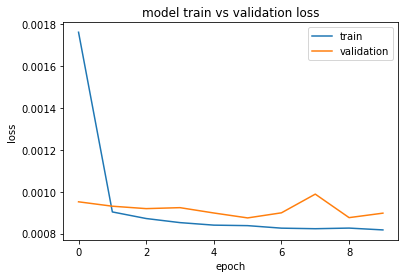

In [64]:
from matplotlib import pyplot
# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [65]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# predicting PM10
predicted_y = model.predict(X_test)

# De-normalising predicted y data
predicted_y = i_sc.inverse_transform(predicted_y)
# De-normalising actual y data
y_actual = i_sc.inverse_transform(y_test.reshape(-1,1))

# calculating RMSE
rmse = sqrt(mean_squared_error(y_actual.reshape(-1,1), predicted_y))
rmse

4.960552958737381

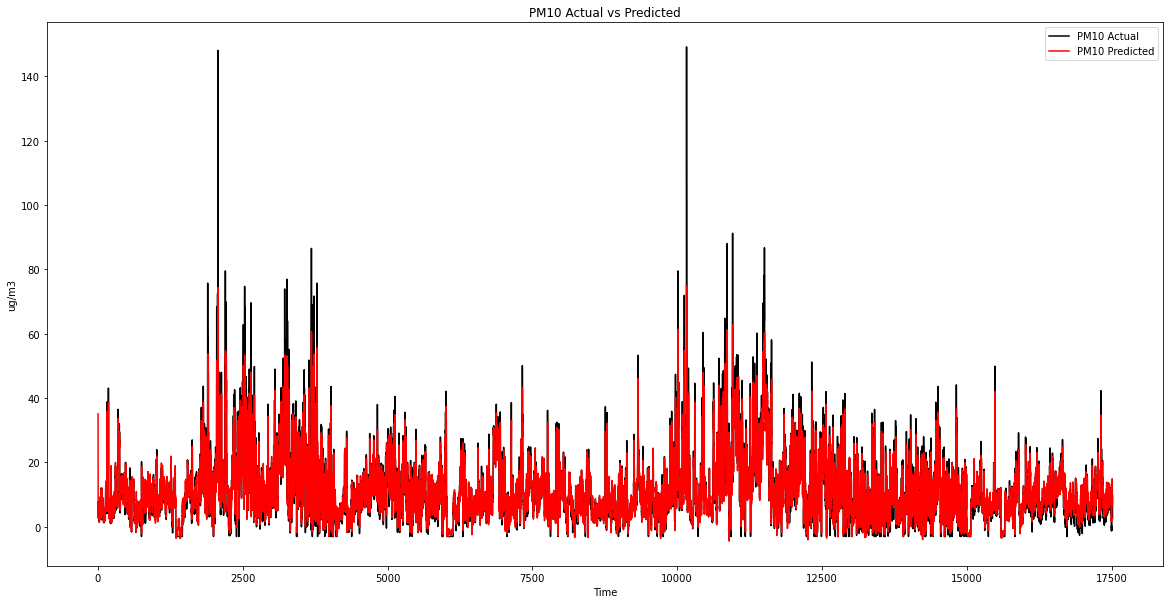

In [66]:
plt.figure(figsize=(20,10))
plt.plot(y_actual, color = 'black', label = 'PM10 Actual')
plt.plot(predicted_y, color = 'red', label = 'PM10 Predicted')
plt.title('PM10 Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('ug/m3')
plt.legend()
plt.show()